In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
# Load data
melbourne_file_path = '../df/Melbourne_housing_extra_data-18-08-2017.csv'
melbourne_data = pd.read_csv(melbourne_file_path) 

# Filter rows with missing values
filtered_melbourne_data = melbourne_data.dropna(axis=0)
melbourne_df = pd.DataFrame(filtered_melbourne_data)
'''
train = filtered_melbourne_data
train = train.drop('Price', axis = 1)

target = filtered_melbourne_data['Price']
'''

#matrix_melbourne = filtered_melbourne_data.as_matrix
# Choose target and predictors
#melbourne_target = filtered_melbourne_data.Price
#melbourne_predictors = ['Rooms', 'Bathroom', 'Landsize', 'BuildingArea', 
#                        'YearBuilt', 'Lattitude', 'Longtitude']
#melbourne_predictors_data = filtered_melbourne_data[melbourne_predictors]
#dir(pd.data)


"\ntrain = filtered_melbourne_data\ntrain = train.drop('Price', axis = 1)\n\ntarget = filtered_melbourne_data['Price']\n"

In [4]:
le = preprocessing.LabelEncoder()
le.fit(list(melbourne_df["Type"]))
new_type = le.transform(list(melbourne_df["Type"]))

melbourne_df["new_type"] = new_type

In [5]:

le.fit(list(melbourne_df["Method"]))
new_method = le.transform(list(melbourne_df["Method"]))
melbourne_df["new_method"] = new_method

Scale

In [6]:
from sklearn.preprocessing import MinMaxScaler 

#melbourne_df['scaledLandsize'] = melbourne_df['Landsize'].values #returns a numpy array

scaler = MinMaxScaler()
melbourne_df = melbourne_df.loc[melbourne_df.YearBuilt != 1196]
#melbourne_df.columns
melbourne_df["Age"] = 2017 - melbourne_df["YearBuilt"]
melbourne_df['scaledLandsize'] = scaler.fit_transform(melbourne_df['Landsize'].values)
melbourne_df['scaledPropertycount'] = scaler.fit_transform(melbourne_df['Propertycount'].values)
melbourne_df['scaledBuildingArea'] = scaler.fit_transform(melbourne_df['BuildingArea'].values)

melbourne_df['scaledAge'] = scaler.fit_transform(melbourne_df['Age'].values)
melbourne_df['scaledDistance'] = scaler.fit_transform(melbourne_df['Distance'].values)
melbourne_df['rateBath'] = melbourne_df["Bathroom"]/melbourne_df["Rooms"]



/home/dockeruser/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/dockeruser/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/dockeruser/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(

In [75]:
print(melbourne_df["Landsize"].sum())
print(melbourne_df["Landsize"].std())
melbourne_df.__class__
dir(preprocessing.MinMaxScaler)

2918359.0
897.449880543


['__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__getstate__',
 '__hash__',
 '__init__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_get_param_names',
 '_reset',
 'data_min',
 'data_range',
 'fit',
 'fit_transform',
 'get_params',
 'inverse_transform',
 'partial_fit',
 'set_params',
 'transform']

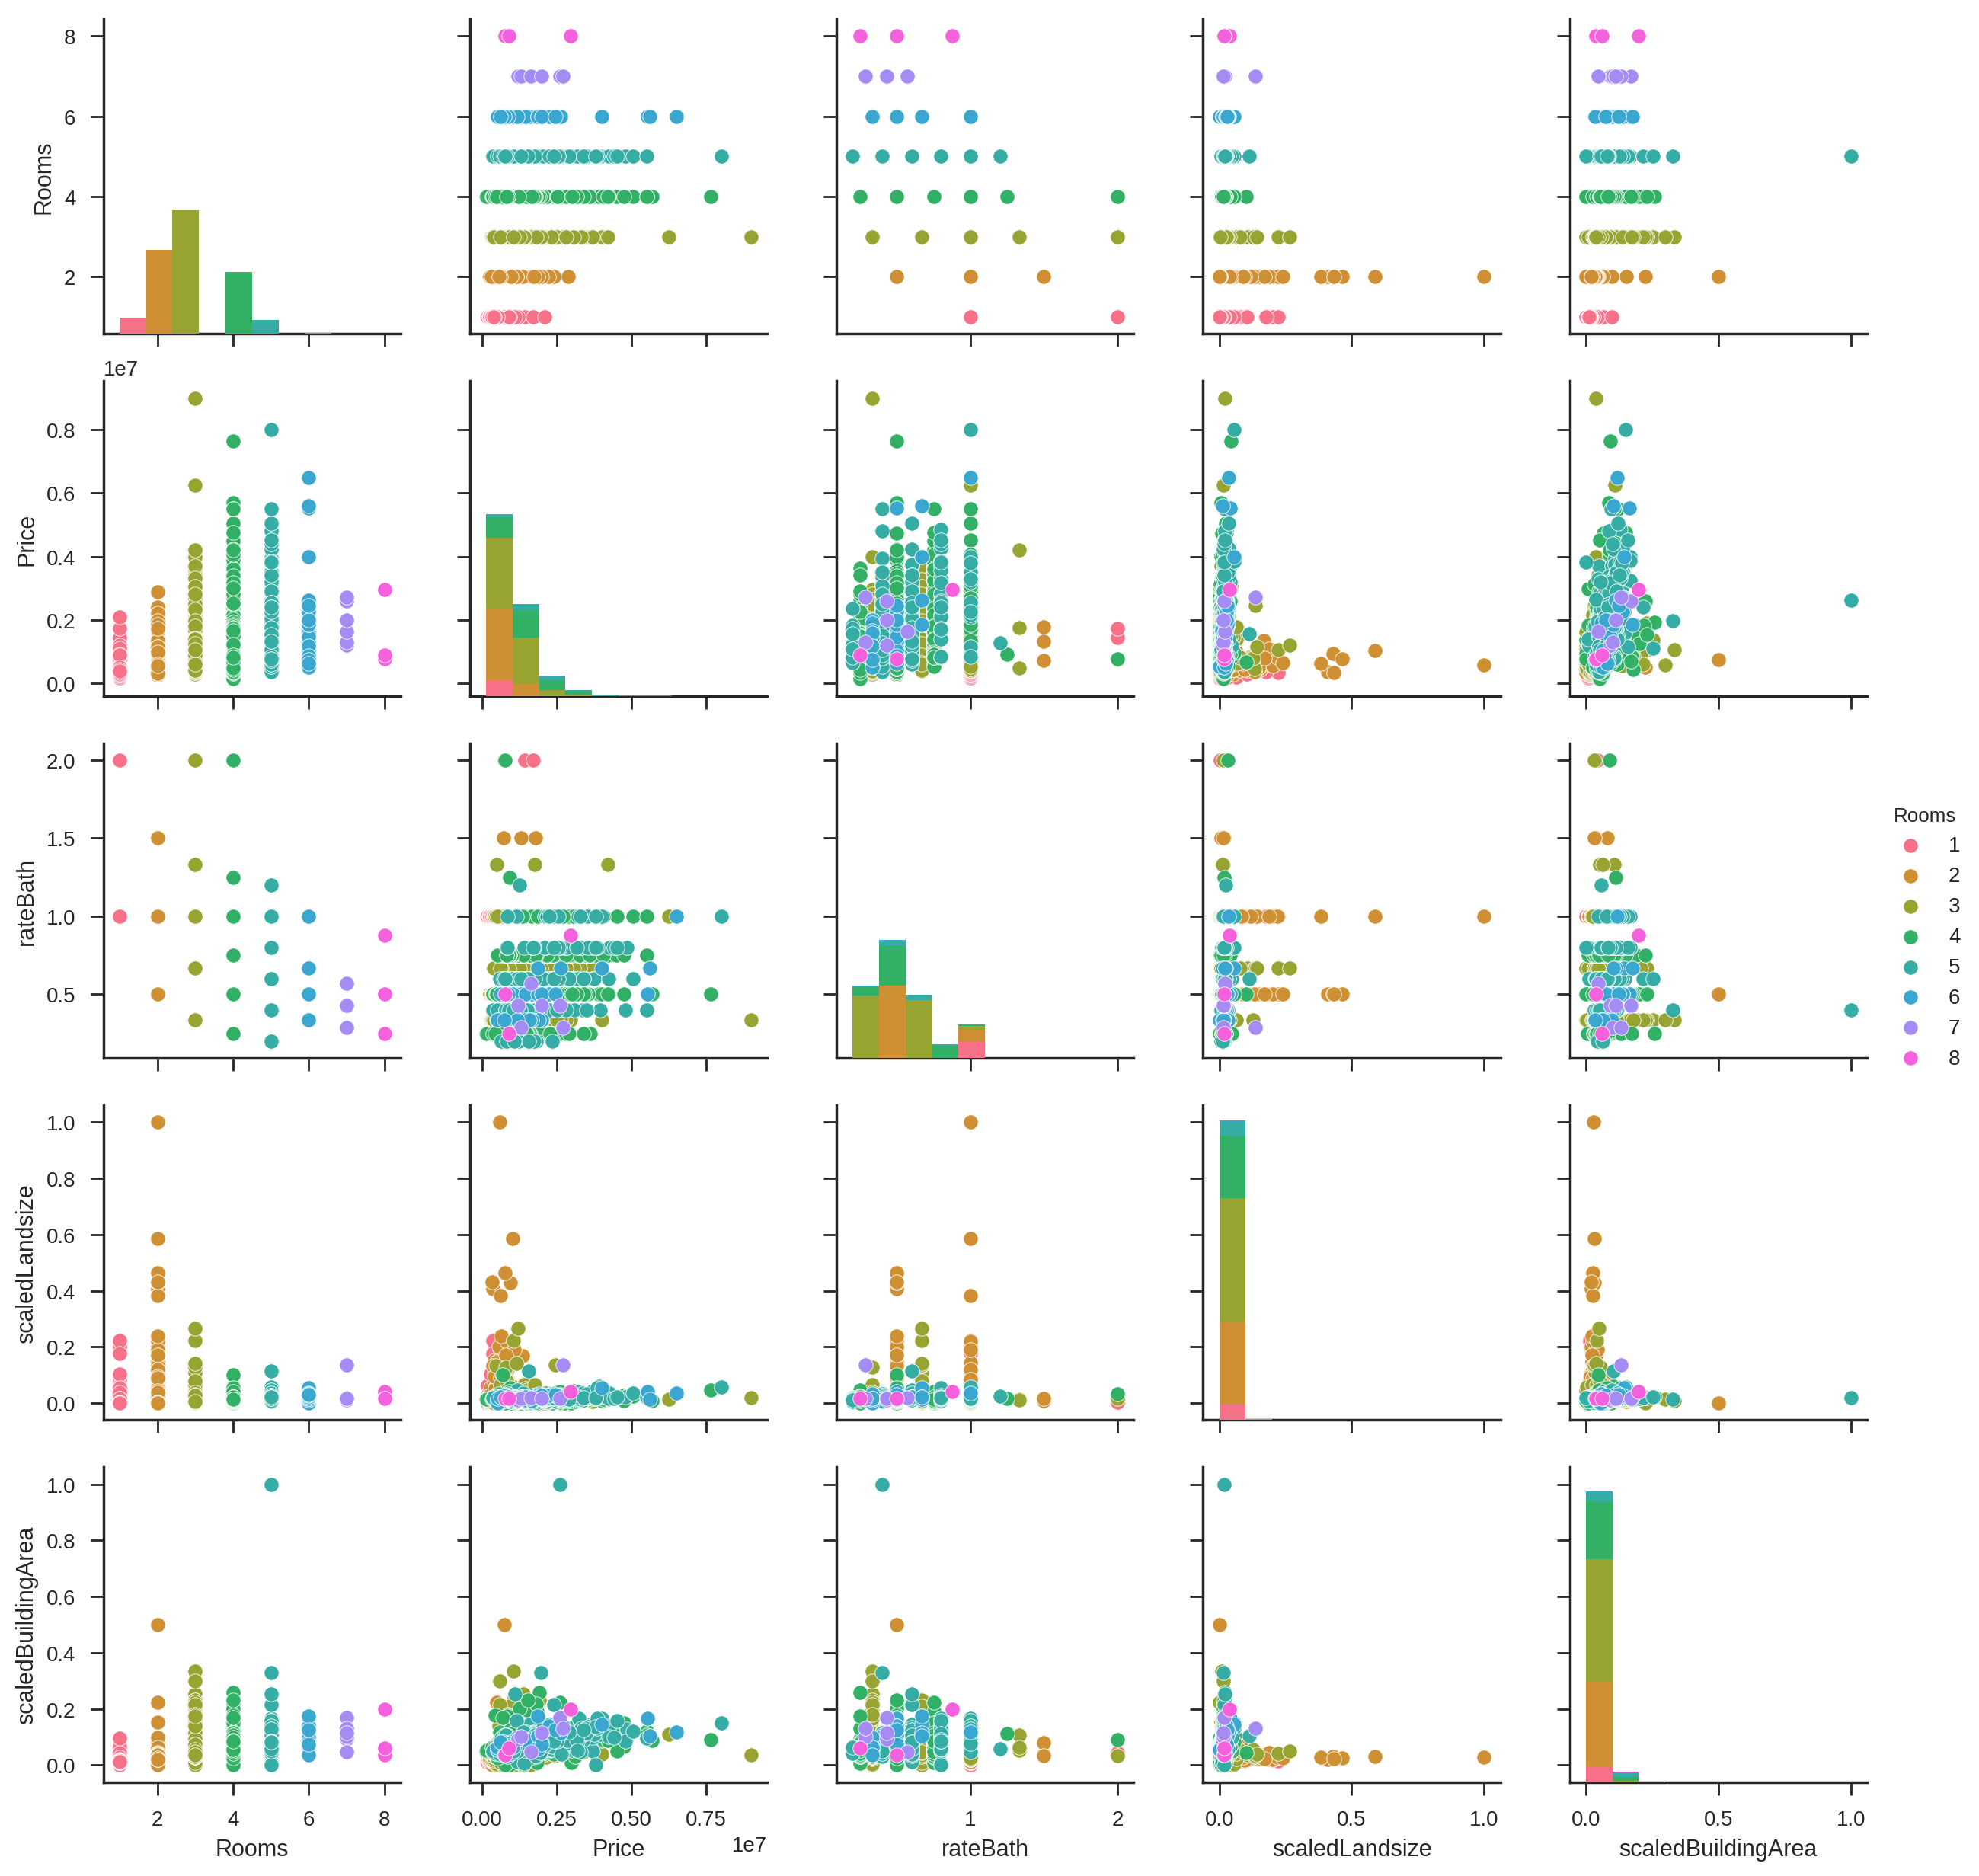

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.plotly as py

#'Landsize','BuildingArea',
melbourne_intPredictors = ['Rooms','Price','Type','rateBath','scaledLandsize','scaledPropertycount','scaledBuildingArea','scaledAge','scaledDistance']
fig = plt.figure()
#ax1 = fig.add_subplot(1, 2, 1)
#ax2 = fig.add_subplot(1, 2, 2)
#ax1.plot(filtered_melbourne_data["Price"])
#ax2.plot(filtered_melbourne_data["Rooms"])
#plt.scatter(filtered_melbourne_data["Rooms"], filtered_melbourne_data["Price"])

#sns.set(style="ticks")
#melbourone_Xpredictors = ["Address", "Rooms", "Method", "Type", "SellerG", ]
melbourne_intData = melbourne_df[melbourne_intPredictors]
#melbourne_intData_
#sns.pairplot(melbourne_intData, hue = "scaledDistance")

plt.scatter(y = melbourne_df["Price"], x = melbourne_df["scaledBuildingArea"])
#ax = plt.subplots()
#melbourne_df.scatter(x=melbourne_df['Rooms'],y=melbourne_df['Price'])
#for c, df in melbourne_df.groupby('Type'):
#    ax.scatter(df['Rooms'], df['Price'], label=c)
#ax.legend()


plt.show()

In [29]:
melbourne_df.columns
help(melbourne_df.drop)

Help on method drop in module pandas.core.generic:

drop(self, labels, axis=0, level=None, inplace=False, errors='raise') method of pandas.core.frame.DataFrame instance
    Return new object with labels in requested axis removed.
    
    Parameters
    ----------
    labels : single label or list-like
    axis : int or axis name
    level : int or level name, default None
        For MultiIndex
    inplace : bool, default False
        If True, do operation inplace and return None.
    errors : {'ignore', 'raise'}, default 'raise'
        If 'ignore', suppress error and existing labels are dropped.
    
        .. versionadded:: 0.16.1
    
    Returns
    -------
    dropped : type of caller



In [31]:
melbourne_df_typeU = melbourne_df.loc[melbourne_df.Type == "u"]
melbourne_df_typeH = melbourne_df.loc[melbourne_df.Type == "h"]
melbourne_df_typeT = melbourne_df.loc[melbourne_df.Type == "t"]


**Random Forest(Type U)**

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
import pylab as plot

In [34]:
melbourne_predictors = ['Rooms','new_type', 'new_method', 'Distance', 'Bedroom2', 'Bathroom',
       'Car', 'Landsize', 'BuildingArea', 'YearBuilt',
       'Lattitude', 'Longtitude', 'Propertycount']
melbourne_predictors_df = melbourne_df_typeU[melbourne_predictors]
melbourne_response_df = melbourne_df_typeU["Price"]

In [39]:

melb_predictors_train, melb_predictors_val, melb_resp_train, melb_resp_val = train_test_split(melbourne_predictors_df, 
                                                                                              melbourne_response_df, test_size = 0.2,
                                                                                              random_state = 0)
mseRF = []
'''
nTreeList = range(50, 500, 10)
for nTrees in nTreeList:
    depth = 6
    maxFeat = 3 #조정
    Melbourne_RFModel = ensemble.RandomForestRegressor(n_estimators=nTrees, max_depth=depth, max_features=maxFeat, random_state=531)
    Melbourne_RFModel.fit(melb_predictors_train, melb_resp_train)
    #데이터 세트에 대한 MSE 누적
    prediction = Melbourne_RFModel.predict(melb_predictors_val)
    mseRF.append(mean_squared_error(melb_resp_val, prediction))
'''
Melbourne_RFModel = ensemble.RandomForestRegressor(random_state=531)
Melbourne_RFModel.fit(melb_predictors_train, melb_resp_train)
prediction = Melbourne_RFModel.predict(melb_predictors_val)
mseRF.append(mean_squared_error(melb_resp_val, prediction))
print("MSE")
print(np.sqrt(mseRF[-1]))

MSE
143745.259569


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
melbourne_df_typeU = melbourne_df.loc[melbourne_df.Type == "u"]

melbourne_intPredictors = ['Rooms','Price','Type','rateBath','scaledLandsize','scaledPropertycount','scaledBuildingArea','scaledAge','scaledDistance']
fig = plt.figure()
sns.set(style="ticks")
melbourne_intData = melbourne_df_typeU[melbourne_intPredictors]
sns.pairplot(melbourne_intData, hue = "Type")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
melbourne_df_typeH = melbourne_df.loc[melbourne_df.Type == "h"]
melbourne_intPredictors = ['Rooms','Price','Type','rateBath','scaledLandsize','scaledPropertycount','scaledBuildingArea','scaledAge','scaledDistance']
fig = plt.figure()
sns.set(style="ticks")
melbourne_intData = melbourne_df_typeH[melbourne_intPredictors]
sns.pairplot(melbourne_intData, hue = "Type")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

melbourne_df_typeT = melbourne_df.loc[melbourne_df.Type == "t"]
melbourne_intPredictors = ['Rooms','Price','Type','rateBath','scaledLandsize','scaledPropertycount','scaledBuildingArea','scaledAge','scaledDistance']
fig = plt.figure()
sns.set(style="ticks")
melbourne_intData = melbourne_df_typeT[melbourne_intPredictors]
sns.pairplot(melbourne_intData, hue = "Type")
plt.show()